In [105]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

#data = np.load('3d_keypoints.npy')
#print(np.shape(data))

f_name = '/data/birds/postures/keypoints/2017_detections/2017-06-01-08-55-11/detections_3d.csv'
#f_name = '/data/birds/postures/keypoints/2019_detections/2019-07-04-07-12-41_LNR/detections_3d.csv'
#all_name = '/data/birds/postures/keypoints/2017_detections/2017-05-31-11-57-48/detections_all.csv'
raw_data = np.genfromtxt(f_name,delimiter = ',')
#all_data = np.genfromtxt(all_name,delimiter=',')
print(np.shape(raw_data))

nice_data = np.reshape(raw_data,[len(raw_data),20,3])

print(raw_data[0])
print(nice_data[0])
print(f_name.replace('.csv','_processed.npy'))
np.save('./test_reshape.npy',nice_data)
print(f_name)

data = np.load('test_reshape.npy')
print(np.shape(data))

(2296, 60)
[0.15865 0.32589 0.25713 0.19561 0.30498 0.23025 0.20556 0.34953 0.25145
 0.25282 0.40125 0.26523 0.18051 0.32231 0.24054 0.17423 0.32506 0.24207
 0.16414 0.33303 0.25773 0.13548 0.26136 0.23444 0.15989 0.32874 0.2573
 0.19232 0.33191 0.2393  0.19879 0.33116 0.23111 0.18722 0.33015 0.2242
 0.20823 0.35128 0.24947 0.1683  0.31594 0.24512 0.19198 0.34571 0.24419
 0.19239 0.35646 0.23849 0.15865 0.32589 0.25713 0.16535 0.30027 0.24428
 0.19803 0.29928 0.2258  0.20711 0.33712 0.22715]
[[0.15865 0.32589 0.25713]
 [0.19561 0.30498 0.23025]
 [0.20556 0.34953 0.25145]
 [0.25282 0.40125 0.26523]
 [0.18051 0.32231 0.24054]
 [0.17423 0.32506 0.24207]
 [0.16414 0.33303 0.25773]
 [0.13548 0.26136 0.23444]
 [0.15989 0.32874 0.2573 ]
 [0.19232 0.33191 0.2393 ]
 [0.19879 0.33116 0.23111]
 [0.18722 0.33015 0.2242 ]
 [0.20823 0.35128 0.24947]
 [0.1683  0.31594 0.24512]
 [0.19198 0.34571 0.24419]
 [0.19239 0.35646 0.23849]
 [0.15865 0.32589 0.25713]
 [0.16535 0.30027 0.24428]
 [0.19803 0.29928

(1883, 300)


<IPython.core.display.Javascript object>


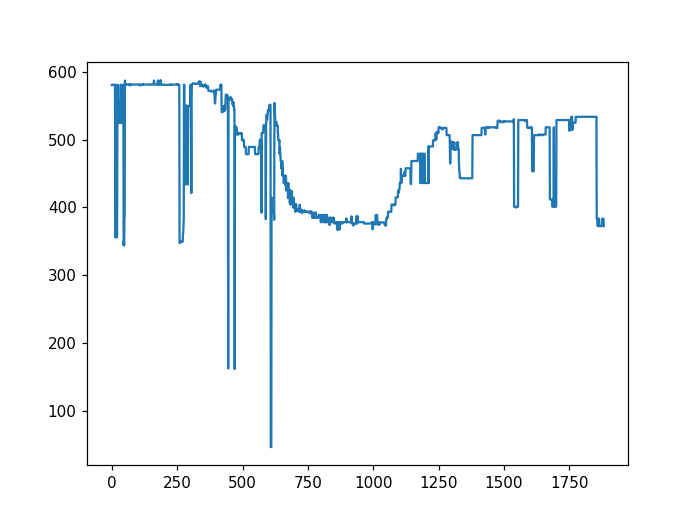

In [45]:

all_name = '/data/birds/postures/keypoints/2017_detections/2017-06-29-08-27-01/detections_all.csv'
all_data = np.genfromtxt(all_name,delimiter=',')
print(np.shape(all_data))

cam1 = all_data[:,60:120]
cam2 = all_data[:,120:180]
cam3 = all_data[:,180:240]
cam4 = all_data[:,240:300]

cam1_nice = np.reshape(cam1,[len(cam1),20,3])
cam2_nice = np.reshape(cam2,[len(cam1),20,3])
cam3_nice = np.reshape(cam3,[len(cam1),20,3])
cam4_nice = np.reshape(cam4,[len(cam1),20,3])

simple_tail = cam4_nice[:,3,1]

fig,ax = plt.subplots()
ax.plot(range(len(simple_tail)),simple_tail)
fig.show()

<IPython.core.display.Javascript object>


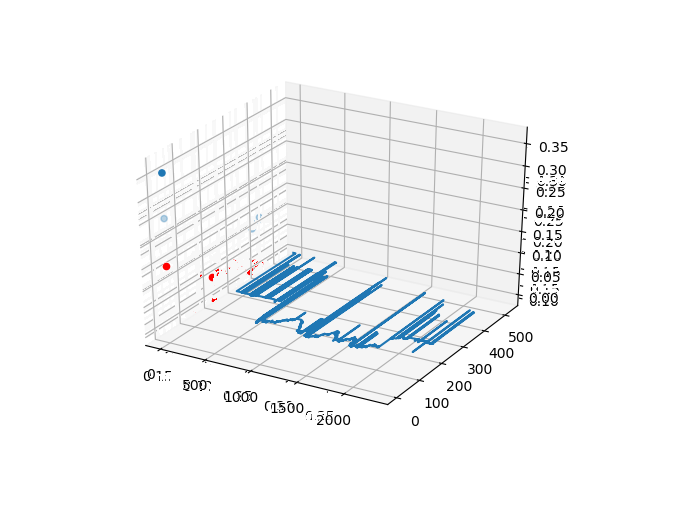

KeyboardInterrupt: 

In [13]:
%matplotlib notebook
keypoint = 0

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.setxlim = [.20,.40]
ax.setylim = [.20,.40]
ax.setzlim = [.26,.36]

ax.scatter([.20,.40],[.20,.40],[.26,.36])

for t in range(len(data)):
    paths = ax.scatter(data[t,keypoint,0],data[t,keypoint,1],data[t,keypoint,2],color='red')
    fig.canvas.draw()
    paths.remove()

<IPython.core.display.Javascript object>


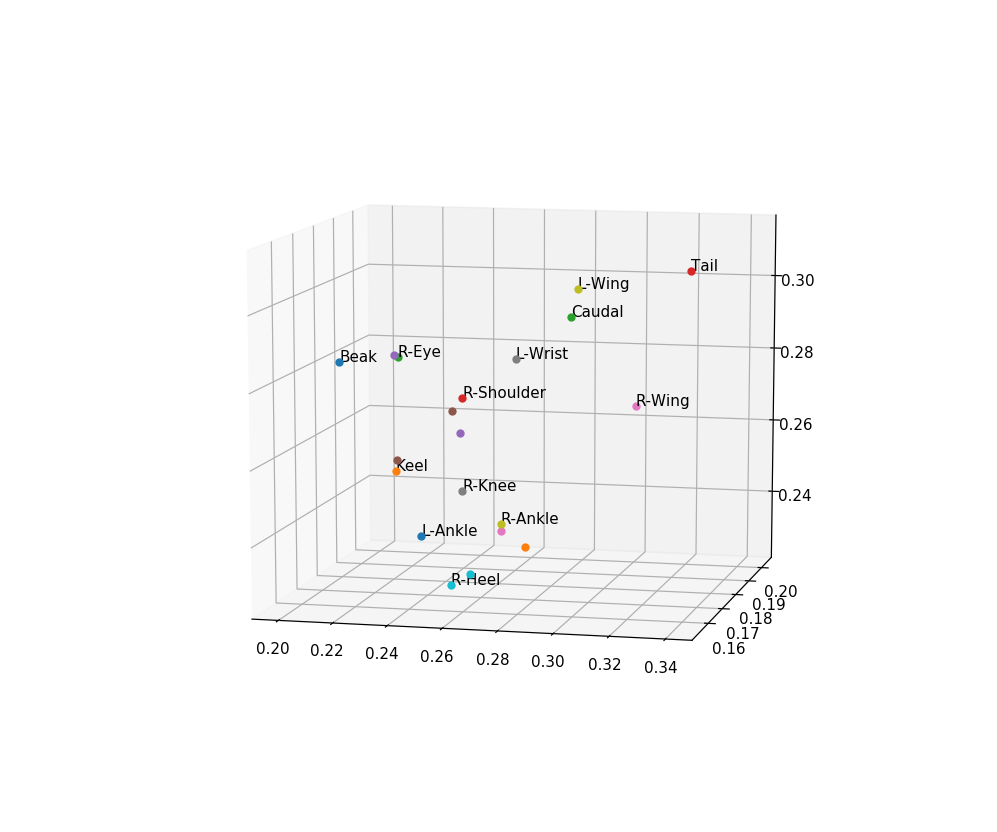

In [18]:
point_list=['Beak','Keel','Caudal','Tail',
            '','','','L-Wrist','L-Wing','','L-Ankle','',
           'R-Eye','R-Shoulder','','','R-Wing','R-Knee','R-Ankle','R-Heel']

t_bin = 952
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')

for p in range(np.shape(data)[1]):
    ax.scatter(data[t_bin,p,0],data[t_bin,p,1],data[t_bin,p,2])
    ax.text(data[t_bin,p,0],data[t_bin,p,1],data[t_bin,p,2],point_list[p])
    
    plt.pause(.01)
    fig.canvas.draw()


<IPython.core.display.Javascript object>


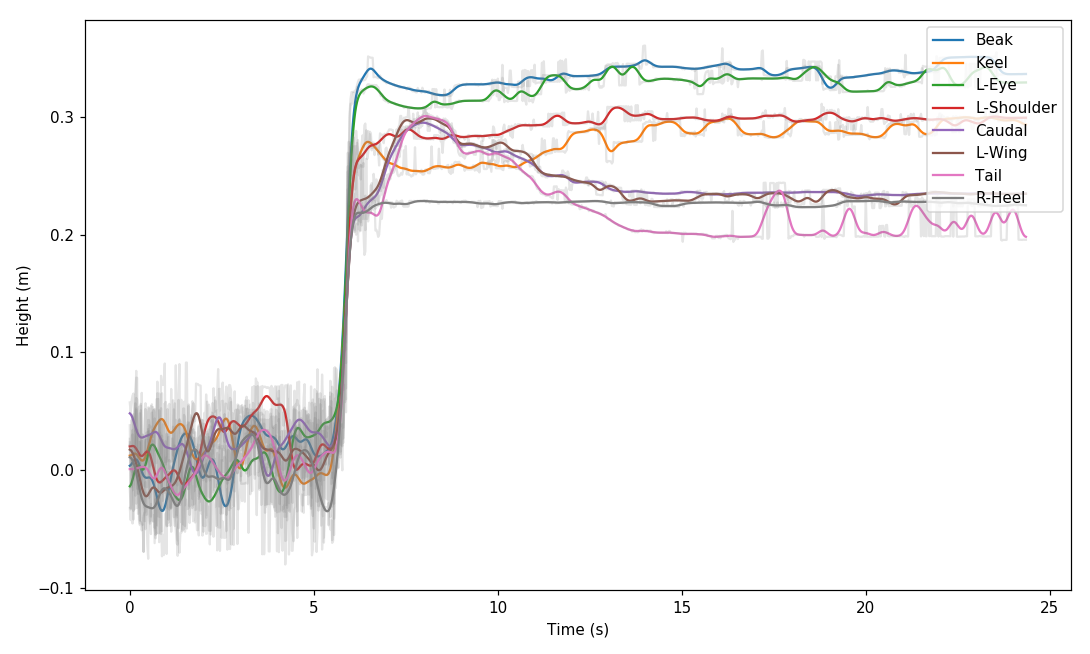

In [97]:
from scipy.ndimage.filters import gaussian_filter
fig, ax = plt.subplots()

point_list=['Beak','Keel','Caudal','Tail',
            'L-Eye','L-Shoulder','L-Elbow','L-Wrist','L-Wing','L-Knee','L-Ankle','',
           'R-Eye','R-Shoulder','','','R-Wing','R-Knee','R-Ankle','R-Heel']

ts = np.arange(len(data)) / 40
for p in [0,1,4,5,2,8,3,19]:
    if p in [8,3,2]:
        al = 1
    else:
        al = 1
    ax.plot(ts,gaussian_filter(data[:,p,2],5),label=point_list[p],alpha=al)
    ax.plot(ts,data[:,p,2],alpha=.2,color='gray')

#ax.set_xlim([ts[240],ts[500]])
#ax.set_ylim([.2,.4])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.legend(loc=1)
fig.patch.set_alpha(0)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)

fig.set_size_inches(10,6)
fig.tight_layout()
fig.savefig('/home/ammon/Desktop/SfNFigs/multi-postures.png',dpi=300)
fig.show()

<IPython.core.display.Javascript object>


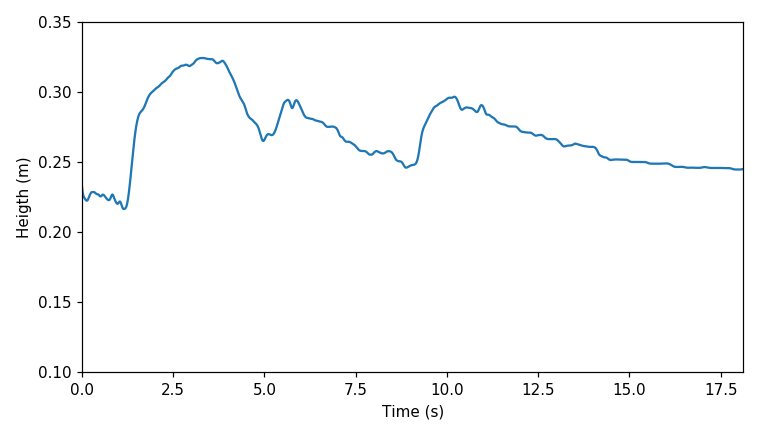

In [122]:
fig, ax = plt.subplots()

ts = np.arange(len(data)) / 80
ax.plot(ts - ts[845], gaussian_filter(data[:,3,2],3))
fig.patch.set_alpha(0)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax.set_ylim([.1,.35])
ax.set_xlim([0,ts[-1] - ts[845]])
ax.set_ylabel('Heigth (m)')
ax.set_xlabel('Time (s)')
fig.set_size_inches([7,4])
fig.tight_layout()
fig.savefig('/home/ammon/Desktop/SfNFigs/2017-06-01-08-55-11.png',dpi=300)
fig.show()

In [33]:
#wing_distance = [np.linalg.norm(data[t,8,:] - data[t,16,:] for t in range(np.shape(data)[0]))]
actual_time = 18
song_onset = 2.7
ts = np.linspace(0,actual_time,len(data))
ts = ts - song_onset
wing_distance = np.zeros(np.shape(data)[0])
for t in range(len(wing_distance)):
    wing_distance[t] = np.linalg.norm(data[t,8,:] - data[t,16,:]) + .05
tail_height = data[:,3,2] -.1 #- data[0,3,2]
eye_center = (data[:,4,:] + data[:,15,:]) / 2
beak_offset = (data[:,0,2] - eye_center[:,2] ) * 2

In [34]:
from scipy.ndimage.filters import gaussian_filter

tail_height_smooth = gaussian_filter(tail_height, sigma=5)
wing_distance_smooth = gaussian_filter(wing_distance, sigma = 5)
beak_offset_smooth = gaussian_filter(beak_offset, sigma = 5)

<IPython.core.display.Javascript object>


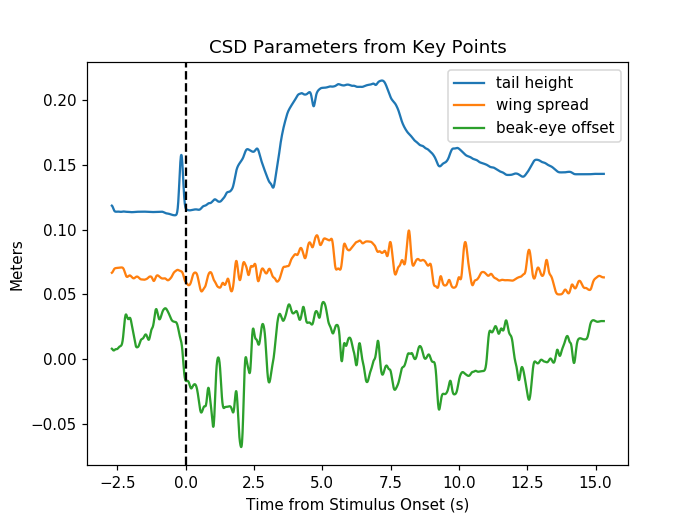

In [35]:
fig, ax = plt.subplots()


ax.plot(ts, tail_height_smooth,label='tail height')
ax.plot(ts, wing_distance_smooth, label='wing spread')
#ax.plot(eye_center)
ax.plot(ts, beak_offset_smooth, label='beak-eye offset')
ax.axvline(0,color='black',linestyle='--')

#ax.set_xlim([-1,6])
ax.set_xlabel('Time from Stimulus Onset (s)')
ax.set_ylabel('Meters')

ax.legend()

ax.set_title('CSD Parameters from Key Points')

fig.show()

In [14]:
actual_time = 3
ts = np.linspace(0,actual_time,len(data))
print(ts, tail_height_smooth)

[0.00000000e+00 1.67597765e-03 3.35195531e-03 ... 2.99664804e+00
 2.99832402e+00 3.00000000e+00] [0.15971336 0.15971336 0.15971336 ... 0.15070977 0.15083061 0.15089239]


In [76]:
len(tail_height_smooth)

1791

In [48]:
## Find the origin (the mean of the mode of the feet)

## In original code, this is order
## I should reshape it to make the 3d_keypoints.npy that I use here.
"""
0-2 Beak Tip 0 
3-5 Keel 1
6-8 Tailbone 2
9-  Tip of Tail 3
12- Left Eye 4
15- Left Shoulder 5
18- Left Elbow 6
21- Left Wrist 7
24- Left Wing Tip 8
27- Left Knee 9
30- Left Ankle 10
33- Left Heel 11
36- Right Eye 12 
39- Right Shoulder 13
42- Right Elbow 14
45- RIght Wrist 15
48- Right Wing Tip 16
51- Right Knee 17
54- Right Ankle 18
57- Right Heel 19
"""

print('left foot:',stats.mode(data[:,11]))
print('right foot:',stats.mode(data[:,19]))

origin = np.mean([stats.mode(data[:,11]).mode[0],stats.mode(data[:,19]).mode[0]],0)
centered_data = data - origin
print("origin",origin)

left foot: ModeResult(mode=array([[0.25862, 0.15546, 0.23009]]), count=array([[33, 34, 35]]))
right foot: ModeResult(mode=array([[0.26202, 0.1861 , 0.2293 ]]), count=array([[29, 32, 30]]))
origin [0.26032  0.17078  0.229695]


In [51]:
print(np.shape(centered_data))
flat_data = np.reshape(centered_data,[len(centered_data),60])

(1883, 20, 3)


In [52]:
## Now, first do a pca of the centered data on one bird
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(flat_data)

## Then do a pca of angles across one bird
## I should define the coordinate system for the space too.


In [55]:
np.round(pca.explained_variance_ratio_,2)

array([0.25, 0.1 , 0.08, 0.06, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [56]:
print(np.round(pca.components_[0],3))

[-0.203 -0.186 -0.207  0.054 -0.236 -0.068  0.007  0.013  0.251  0.131
  0.037  0.501  0.031 -0.082 -0.184  0.052 -0.1   -0.162 -0.058 -0.016
 -0.08   0.189 -0.051 -0.159 -0.022  0.065  0.308 -0.05   0.016 -0.06
  0.011  0.009 -0.004  0.085  0.068  0.081  0.007 -0.073 -0.205  0.009
 -0.061 -0.209 -0.084  0.004 -0.042  0.058  0.065 -0.206  0.025  0.013
  0.186 -0.02  -0.074 -0.044  0.009 -0.023 -0.012 -0.002 -0.099  0.002]


In [57]:
len(pca.components_[0,:])

60

In [58]:
np.shape(principalComponents)

(1883, 60)

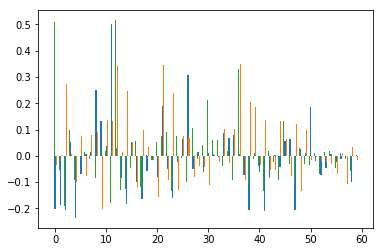

In [64]:
plt.bar(range(len(pca.components_[0])),pca.components_[0],width=.3)
plt.bar(np.arange(len(pca.components_[0]))+.2,pca.components_[1],width=.2)
plt.bar(np.arange(len(pca.components_[0]))-.2,pca.components_[2],width=.2)


plt.show()

In [60]:
plt.plot(flat_data[:,0])
plt.plot(flat_data[:,1])
plt.plot(flat_data[:,2])

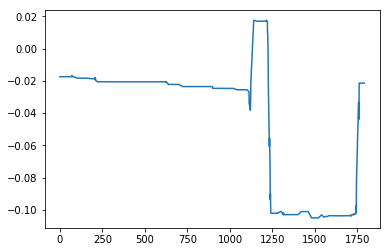

In [73]:
plt.plot(centered_data[:,-1,0])

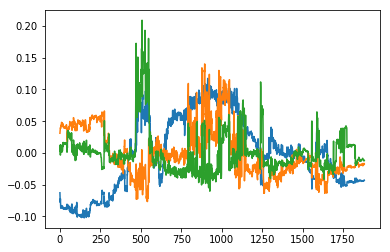

In [62]:
## Write 
%matplotlib inline

plt.plot(principalComponents[:,0])
plt.plot(principalComponents[:,1])
plt.plot(principalComponents[:,2])

plt.show()

In [95]:
## Calculate all the angles!! 

def angle(v1,v2):
    #angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))
    angle = np.arctan(np.linalg.norm(v1-v2)/np.linalg.norm(v1))
## Quick hack to keep track of directionality 
    if v2[2] < v1[2]:
        angle = angle * -1
    deg_angle = np.round(np.degrees(angle),4)
    return deg_angle

eye_center = np.mean([centered_data[:,4],centered_data[:,12]],0)
shoulder_center = np.mean([centered_data[:,5],centered_data[:,13]],0)

full_data = np.empty([1791,22,3])
full_data[:,:20] = centered_data
full_data[:,20] = eye_center
full_data[:,21] = shoulder_center

"""
0-2 Beak Tip 0 BT
3-5 Keel 1 KE
6-8 Tailbone 2 TB
9-  Tip of Tail 3 TT
12- Left Eye 4 LE
15- Left Shoulder 5 LS
18- Left Elbow 6 LB
21- Left Wrist 7 LW
24- Left Wing Tip 8 LT
27- Left Knee 9 LK
30- Left Ankle 10 LA
33- Left Heel 11 LH
36- Right Eye 12 RE
39- Right Shoulder 13 RS
42- Right Elbow 14 RB
45- RIght Wrist 15 RW
48- Right Wing Tip 16 RT
51- Right Knee 17 RK
54- Right Ankle 18 RA
57- Right Heel 19 RH
Eye Center (mean of 4,12): 20 EC 
Neck (shoulder Center, mean of 5,13): 21 NC
"""
## Define all the angles!!! =/
# Calculate all the angles!!! :D
angle_dict = {
    'neck-eye-beak':0,
    'eye-eye_center-horizontal':1,
    'left_elbow-wrist-tip':2,
    'right_elbow-wrist-tip':3,
    'left_wrist-neck-wrist':4,
    'eye-neck-tailbone':5,
    'neck-tailbone-tail':6,
    'left_knee-tailbone-knee':7,
    'tailbone-left_knee-ankle':8,
    'tailbone-right_knee-ankle':9,
    'left_knee-ankle-heel':10,
    'right_knee-ankle-heel':11
}
all_angles = np.zeros([1791,14])
# Neck-eye-beak (NC_EC_BT): 20-21,20-0 
EC_NC = full_data[:,20] - full_data[:,21]
EC_BT = full_data[:,20] - full_data[:,0]
NC_EC_BT = [angle(v1,v2) for v1,v2 in zip(EC_NC,EC_BT)]
all_angles[:,0] = NC_EC_BT

# Eye-Eye_center-horizontal plane: 20-12(with z20),20-12
horizontal_eye = np.array(full_data[:,12])
horizontal_eye[:,2] = full_data[:,20,2]
EC_LE = full_data[:,20] - full_data[:,12]
EC_HP = full_data[:,20] - horizontal_eye
LE_EC_HP = [angle(v1,v2) for v1,v2 in zip(EC_LE,EC_HP)]
all_angles[:,1] = LE_EC_HP

# Elbow-wrist-tip: 7-6,7-8 
LW_LB = full_data[:,7] - full_data[:,6]
LW_LT = full_data[:,7] - full_data[:,8]
LB_LW_LT = [angle(v1,v2) for v1,v2 in zip(LW_LB,LW_LT)]
all_angles[:,2] = LB_LW_LT

# Right EWT: 15-14, 15-16
RW_RB = full_data[:,15] - full_data[:,14]
RW_RT = full_data[:,15] - full_data[:,16]
RB_RW_RT = [angle(v1,v2) for v1,v2 in zip(RW_RB,RW_RT)]
all_angles[:,3] = RB_RW_RT

# Wrist-Neck-wrist: 21-7,21-15
NC_LW = full_data[:,21] - full_data[:,7]
NC_RW = full_data[:,21] - full_data[:,15]
LW_NC_RW = [angle(v1,v2) for v1,v2 in zip(NC_LW,NC_RW)]
all_angles[:,4] = LW_NC_RW

# Eye-Neck-Tailbone: 21-2,21-20
NC_TB = full_data[:,21] - full_data[:,2]
NC_EC = full_data[:,21] - full_data[:,20]
EC_NC_TB = [angle(v1,v2) for v1,v2 in zip(NC_TB,NC_EC)]
all_angles[:,5] = EC_NC_TB

# Neck-Tailbone-Tail: 2-21,2-3
TB_NC = full_data[:,2] - full_data[:,21]
TB_TT = full_data[:,2] - full_data[:,3]
NC_TB_TT = [angle(v1,v2) for v1,v2 in zip(TB_NC,TB_TT)]
all_angles[:,6] = NC_TB_TT

# Knee-Tailbone-Knee: 2-9,2-17
TB_LK = full_data[:,2] - full_data[:,9]
TB_RK = full_data[:,2] - full_data[:,17]
LK_TB_RK = [angle(v1,v2) for v1,v2 in zip(TB_LK,TB_RK)]
all_angles[:,7] = LK_TB_RK

# Tailbone-Knee-Ankle: 9-2,9-10
LK_TB = full_data[:,9] - full_data[:,2]
LK_LA = full_data[:,9] - full_data[:,10]
TB_LK_LA = [angle(v1,v2) for v1,v2 in zip(LK_TB,LK_LA)]
all_angles[:,8] = TB_LK_LA

# Right TKA: 17-2,17-18
RK_TB = full_data[:,17] - full_data[:,2]
RK_RA = full_data[:,17] - full_data[:,18]
TB_RK_RA = [angle(v1,v2) for v1,v2 in zip(RK_TB,RK_RA)]
all_angles[:,9] = TB_RK_RA

# Knee-Ankle-Heel: 10-9,10-11
LA_LK = full_data[:,10] - full_data[:,9]
LA_LH = full_data[:,10] - full_data[:,11]
LK_LA_LH = [angle(v1,v2) for v1,v2 in zip(LA_LK,LA_LH)]
all_angles[:,10] = LK_LA_LH

# Right KAH: 18-17,18-19
RA_RK = full_data[:,18] - full_data[:,17]
RA_RH = full_data[:,18] - full_data[:,19]
RK_RA_RH = [angle(v1,v2) for v1,v2 in zip(RA_RK,RA_RH)]
all_angles[:,11] = RK_RA_RH

## Could add location of legs
## Horizontal and Vertical location of body
## neck to wing tip (would get flaring of wings!)






In [97]:
pca_angle = PCA()
principalComponents_angle = pca_angle.fit_transform(all_angles)

(1791,)

<IPython.core.display.Javascript object>


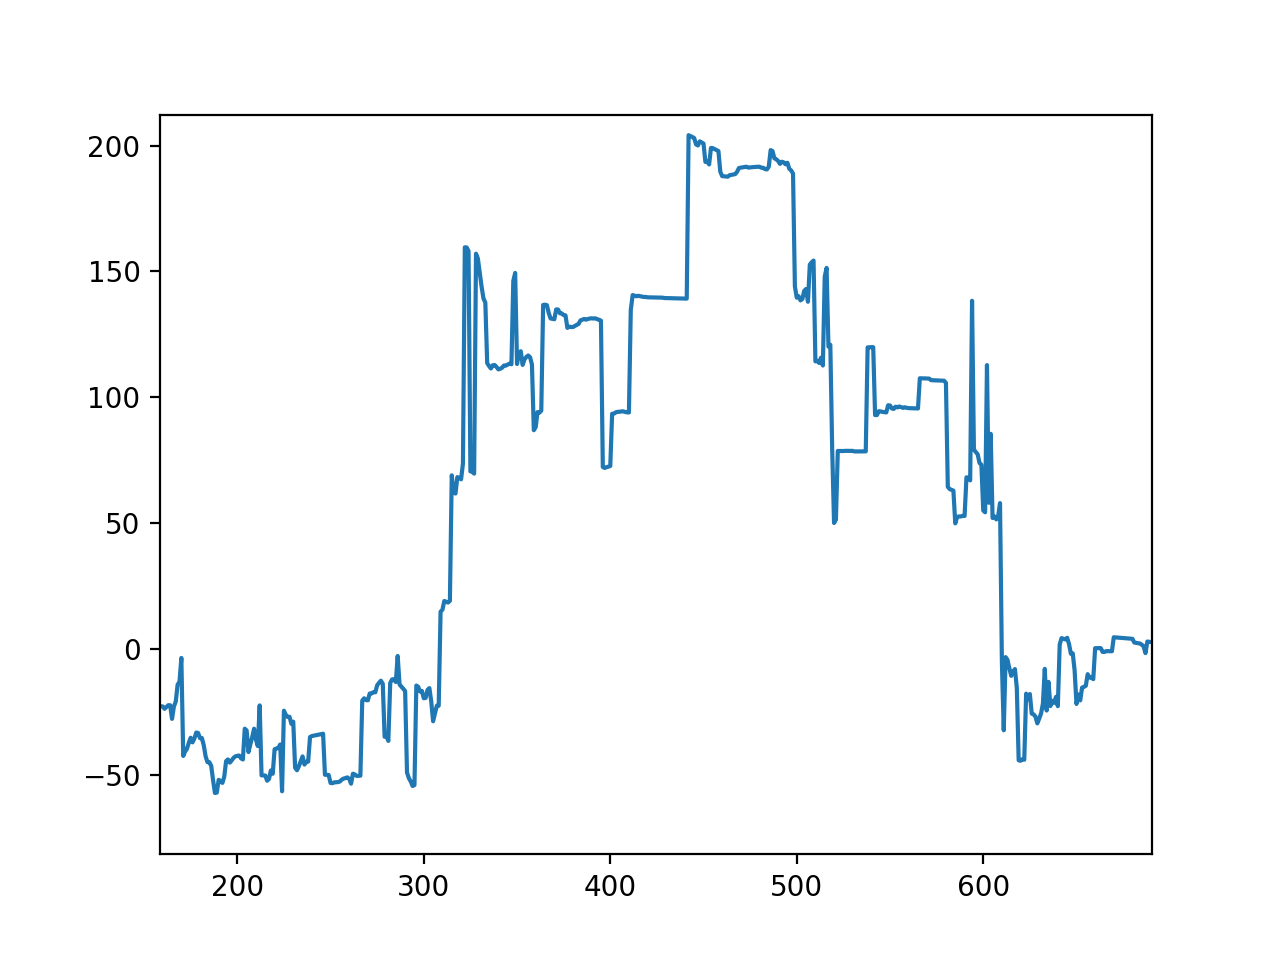

In [114]:
%matplotlib notebook

## This is too messy to do stats, but that is because of keypoint noise. I can keep preparing the code, so it's ready


plt.plot(principalComponents_angle[:,0])
#plt.plot(principalComponents_angle[:,1])
#plt.plot(principalComponents_angle[:,2])

plt.show()

In [104]:
print(np.round(pca_angle.explained_variance_ratio_,2))
print(np.round(pca_angle.components_[0],3))
print(np.round(pca_angle.components_[1],3))
print(np.round(pca_angle.components_[2],3))

[0.35 0.24 0.19 0.06 0.05 0.04 0.04 0.01 0.01 0.01 0.   0.   0.   0.  ]
[-0.255 -0.054 -0.425 -0.434  0.249  0.319 -0.631  0.013  0.01   0.011
  0.024 -0.002  0.     0.   ]
[ 0.694 -0.089 -0.012 -0.262 -0.597  0.128 -0.255  0.014 -0.002  0.041
 -0.033  0.009 -0.    -0.   ]
[-0.638  0.001 -0.079 -0.018 -0.748 -0.143 -0.042 -0.006  0.006 -0.001
  0.054  0.037  0.     0.   ]


In [19]:
import glob
my_dir = './Keypoints/detections/'
print(os.path.abspath(my_dir))

/home/ammon/Documents/Scripts/AnalyzePosture/Keypoints/detections


In [16]:
import os
os.path.abspath(my_dir)

TypeError: expected str, bytes or os.PathLike object, not list

In [23]:
postures_dir = '~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'
os.path.abspath(postures_dir) + '/'

'/home/ammon/Documents/Scripts/AnalyzePosture/~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'

In [27]:
glob.glob(os.path.expanduser('/home/ammon/Documents/Scripts/AnalyzePosture'))

['/home/ammon/Documents/Scripts/AnalyzePosture']

In [34]:
test = np.array([1,2,3,4])

base_ar = np.empty([0,4])
one = np.vstack([base_ar,test])
two = np.vstack([one,test])
print(two)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]]


In [33]:
np.vstack([base_ar,test])

array([[1., 2., 3., 4.]])

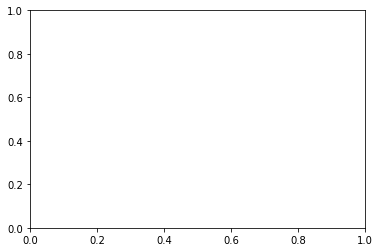

In [35]:
fig,ax = plt.subplots()
ax.set_t

In [13]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1,1,1], [2,2,2,3], [3,3,3,3], [3,3,3,4],[4,4,4,4], [5,5,5,5]])
y = np.array([[1,1,1,2],[1,1,1,3],[2,2,2,3], [3,3,3,4], [4,4,4,5],[5,5,5,5]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

4.732050807568877


In [12]:
print(path)

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 3), (4, 4), (5, 5)]


In [6]:
transform = [p[0] for p in path]

In [9]:
print(transform) ##transform is the mapping from x to y
x[transform] ## Remove transform duplicates to get a functional mapping...? 
## Also need to calculate cost. 

[0, 0, 1, 2, 3, 4, 5]


array([[1, 1],
       [1, 1],
       [2, 2],
       [3, 3],
       [3, 3],
       [4, 4],
       [5, 5]])

array([1, 2, 3, 4, 5])

In [1]:
import numpy as np

In [19]:
r_array = np.random.random([10,10])

print(r_array)
np.unravel_index(r_array.argmin(), r_array.shape)

[[0.12289922 0.02880524 0.66294292 0.68989693 0.11622949 0.27631564
  0.52903204 0.62247577 0.51781744 0.19915685]
 [0.44666729 0.36254657 0.53018522 0.31175778 0.30921952 0.64303551
  0.6885822  0.75139469 0.4931861  0.22202125]
 [0.86569627 0.55357155 0.94804578 0.95526218 0.02787873 0.1383378
  0.0340153  0.92477675 0.63958155 0.19486355]
 [0.68594865 0.039527   0.06027236 0.31913685 0.83864616 0.26352309
  0.70370345 0.74031002 0.31323584 0.9759804 ]
 [0.10800833 0.80229786 0.83323513 0.27302701 0.43812291 0.18008573
  0.81105442 0.35887448 0.44476035 0.12733007]
 [0.61284097 0.25893229 0.19386116 0.24529571 0.24266826 0.01082657
  0.68446871 0.82687841 0.45552839 0.20587851]
 [0.88819271 0.53643387 0.25007764 0.28811126 0.79142323 0.16511617
  0.33268342 0.79192697 0.77672886 0.10640684]
 [0.04014138 0.10517536 0.32233826 0.90320812 0.4577442  0.19025126
  0.4328414  0.73645529 0.75122812 0.32335632]
 [0.16076646 0.10881355 0.48465574 0.16873871 0.66241457 0.27242135
  0.751435   

(5, 5)

In [7]:
e_array = np.empty([5,5])
e_array.fill(np.nan)

In [8]:
print(e_array)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [10]:
r2_array = np.array(r_array)
r2_array[0,0] = 0
print(r_array)
print(r2_array)

[[0.28482405 0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]
[[0.         0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]


In [13]:
r_array[:-1]

array([[0.28482405, 0.71841605, 0.42362389, 0.78988978, 0.92675715],
       [0.83052831, 0.42127885, 0.27805611, 0.0490208 , 0.03176831],
       [0.22750377, 0.99928964, 0.72518024, 0.74627136, 0.06494073],
       [0.12304869, 0.4563184 , 0.63421683, 0.28010245, 0.4951428 ]])

In [22]:
i = 4
j = 7

A = np.arange(10)
sub_index = (A[(A != j) & (A != i)])
print(sub_index)

[0 1 2 3 5 6 8 9]


In [27]:
np.array(r_array[sub_index])[:,sub_index]

array([[0.12289922, 0.02880524, 0.66294292, 0.68989693, 0.27631564,
        0.52903204, 0.51781744, 0.19915685],
       [0.44666729, 0.36254657, 0.53018522, 0.31175778, 0.64303551,
        0.6885822 , 0.4931861 , 0.22202125],
       [0.86569627, 0.55357155, 0.94804578, 0.95526218, 0.1383378 ,
        0.0340153 , 0.63958155, 0.19486355],
       [0.68594865, 0.039527  , 0.06027236, 0.31913685, 0.26352309,
        0.70370345, 0.31323584, 0.9759804 ],
       [0.61284097, 0.25893229, 0.19386116, 0.24529571, 0.01082657,
        0.68446871, 0.45552839, 0.20587851],
       [0.88819271, 0.53643387, 0.25007764, 0.28811126, 0.16511617,
        0.33268342, 0.77672886, 0.10640684],
       [0.16076646, 0.10881355, 0.48465574, 0.16873871, 0.27242135,
        0.751435  , 0.06861369, 0.58452765],
       [0.30715623, 0.26005574, 0.14593131, 0.27300033, 0.07362849,
        0.87292077, 0.04438781, 0.97743004]])

In [68]:
## Load packages and data

import numpy as np
import pickle
from align_postures import Trajectory
import os
from matplotlib import pyplot as plt
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

with open('./seqs.dat','rb') as f:
    seqs = pickle.load(f)
    
with open('./path_dict.pkl','rb') as f:
    path_dict = pickle.load(f)

In [69]:
### Build color dicts
from matplotlib import colors as mcolors
from matplotlib import cm

## Song Colormap: 
# set up color dicts, etc for Plotting:
songs_ordered = ['BDY.wav','BOD.wav','LB.wav','2M.wav','DMG.wav','LB-.wav','BDY-.wav']
songs = songs_ordered

song_colors = list(list(cm.viridis(int(c * 255 / len(songs)))) for c in range(len(songs)))

#color_dict = dict(zip(songs,mcolors.BASE_COLORS.keys()))
songColors = dict(zip(songs,song_colors))
for s in songs:
    songColors['m'+s] = songColors[s]

dates = sorted(set(seq.date for seq in seqs[:39]))
date_colors = list(list(cm.viridis(int(c * 255 / len(dates)))) for c in range(len(dates)))
dateColors = dict(zip(dates, date_colors))

hours = sorted(set(seq.time.split(':')[0] for seq in seqs[:39]))
hour_colors = list(list(cm.viridis(int(c * 255 / len(hours)))) for c in range(len(hours)))
hourColors = dict(zip(hours,hour_colors))

# default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
p_colors = prop_cycle.by_key()['color']

# Jet colors
t_colors = list(list(cm.jet(int(c * 255 / 10))) for c in range(10))

print(p_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[20, 26]


<IPython.core.display.Javascript object>


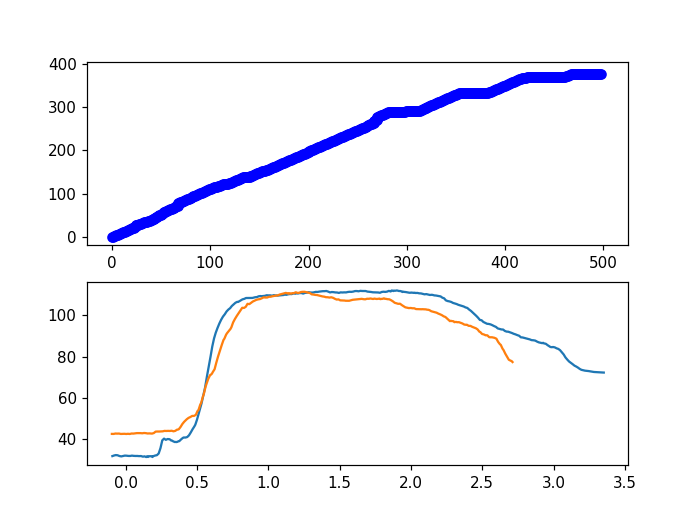

In [70]:
print(seqs[40].parents)
path = path_dict['27,38']

fig,(ax1,ax2) = plt.subplots(2)
for p in path:
    ax1.scatter(p[0],p[1],color='blue')
    
ax2.plot(seqs[40].ts,seqs[40].data[:,0])
#ax2.plot(seqs[27].ts,seqs[27].data[:,0])
ax2.plot(seqs[39].ts,seqs[39].data[:,0])
fig.show()

In [8]:
print(seqs[76].parents)
print(seqs[75].parents)
print(seqs[74].parents)


#plt.plot(seqs[75].ts,seqs[75].data[:,0])
plt.plot(seqs[73].ts,seqs[73].data[:,0],color='g')
#plt.plot(seqs[73].ts,seqs[73].data[:,1],color='b')
plt.plot(seqs[74].ts,seqs[74].data[:,0],color='orange')
#plt.plot(seqs[74].ts,seqs[74].data[:,1],color='r')

plt.show()

[8, 75]
[73, 74]
[70, 71]


<IPython.core.display.Javascript object>


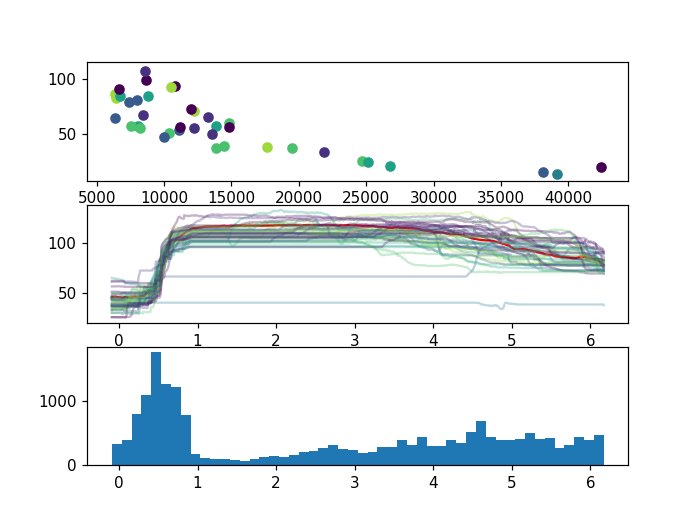

0 6350.110598733407 86.15161482643863
1 6427.312062498047 82.66443097502466
2 11105.287505088865 53.82379465520711
3 17664.88995385742 37.6837413866605
4 6704.365249340816 83.90934650759858
5 8080.815836800774 57.500122132481
6 14781.571549897462 59.54677174307304
7 8444.68180414843 67.35561644184894
8 39153.975565294895 13.702369854987651
9 13842.726040666012 57.40031106575186
10 38104.12862960841 15.274700066777807
11 10365.361646043953 50.70189335089447
12 8624.769951480965 98.74400216930417
13 14433.276373739254 39.106840236309544
14 21844.251131387213 33.84962980515812
15 24670.414426176743 25.608979835963574
16 9956.411581881817 47.21871502794125
17 12213.528031891597 70.43448396822455
18 10792.254461181645 93.00281728527263
19 13525.83572992285 50.265202790608946
20 7562.413246054201 56.63335910718259
21 26763.614776951155 20.970644530373622
22 42421.12396543363 19.890050747207813
23 11147.098520600104 56.43622259613238
24 8825.227384838865 83.95064337658505
25 8202.116543293949

In [72]:
from align_postures import dtw_align
%matplotlib notebook

fig,(ax1,ax2,ax3) = plt.subplots(3)
ax2.plot(seqs[75].ts,seqs[75].response_data[:,0],color='red')
costs = np.zeros(len(seqs[75].ts))
cost_counts = []

for s in range(39):
    distance,path = fastdtw(seqs[75].vel,seqs[s].vel)
    aligned_data, aligned_ts, cost, cost_points = dtw_align(seqs[75],seqs[s],path=path,strat='canon')
    print(seqs[s].index,distance,cost)
    round_costs = np.round(cost_points * 10)
    for t in range(len(round_costs)):
        [cost_counts.append(x) for x in [aligned_ts[t]]*int(round_costs[t])]
    ax1.scatter(distance,cost,color=songColors[seqs[s].song])
    ax2.plot(aligned_ts,aligned_data[:,0],alpha=.3,color=songColors[seqs[s].song])
    
ax3.hist(cost_counts,bins=50)

fig.show()

In [49]:
A = np.load('./all_distances.npy')

X = A[:39]
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            X[i,j] = 0
        else:
            X[j,i] = X[i,j]
print(X)

[[    0.          1500.13993671  4076.46983623 ...  2542.76403035
  10851.33745952  5735.39065256]
 [ 1500.13993671     0.          3675.17464938 ...  2073.31155725
  12042.30195058  5483.2018808 ]
 [ 4076.46983623  3675.17464938     0.         ...  4561.2620402
  10096.82674618  6860.59750488]
 ...
 [ 2542.76403035  2073.31155725  4561.2620402  ...     0.
  11678.58056347  6451.416036  ]
 [10851.33745952 12042.30195058 10096.82674618 ... 11678.58056347
      0.         11918.30381414]
 [ 5735.39065256  5483.2018808   6860.59750488 ...  6451.416036
  11918.30381414     0.        ]]


In [50]:
import numpy as np
from sklearn.manifold import TSNE

A = np.load('./all_distances.npy')

X = A[:39]
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            X[i,j] = 0
        else:
            X[j,i] = X[i,j]
            
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(39, 2)

<IPython.core.display.Javascript object>


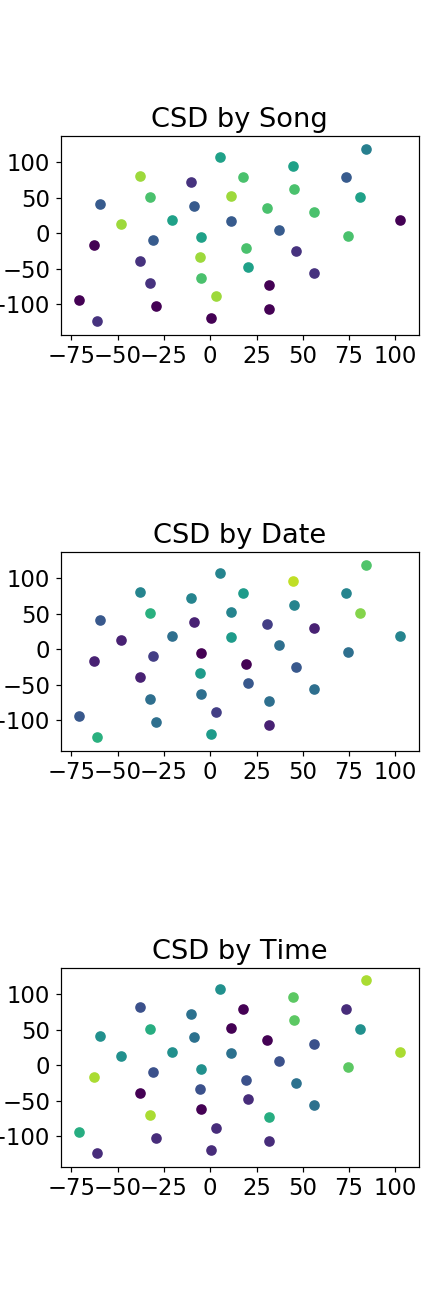

In [51]:
fig,[ax1,ax2,ax3] = plt.subplots(3)

for i in range(len(X_embedded)):
    ax1.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=songColors[seqs[i].song])
    ax2.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=dateColors[seqs[i].date])
    ax3.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=hourColors[seqs[i].time.split(':')[0]])
    
ax1.set_title('CSD by Song')
ax2.set_title('CSD by Date')
ax3.set_title('CSD by Time')

fig.tight_layout()
fig.set_size_inches([4,12])
fig.show()

In [128]:
from scipy.ndimage.filters import gaussian_filter1d
np.transpose(gaussian_filter1d(np.transpose(data),sigma=1))

array([[7.68465529e+01, 5.66206027e-05],
       [6.22379656e+01, 8.21636812e-05],
       [4.63973552e+01, 1.22130898e-04],
       ...,
       [1.08066342e+02, 1.30538068e-04],
       [1.08043647e+02, 1.30461798e-04],
       [1.08036403e+02, 1.30300662e-04]])

<IPython.core.display.Javascript object>


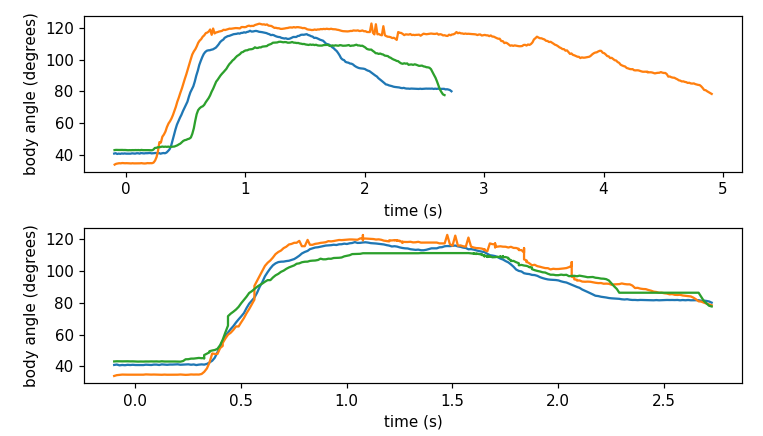

In [133]:
fig, (ax1,ax2) = plt.subplots(2)

a,b,c = (0,25,7)
ax1.plot(seqs[0].ts,seqs[0].data[:,0])
ax1.plot(seqs[b].ts,seqs[b].data[:,0])
ax1.plot(seqs[c].ts,seqs[c].data[:,0])

ax1.set_xlabel('time (s)')
ax1.set_ylabel('body angle (degrees)')

aligned_b, aligned_tsB, cost, cost_points = dtw_align(seqs[0],seqs[b],strat='canon')
aligned_c, aligned_tsC, cost_c, cost_points_c = dtw_align(seqs[0],seqs[c],strat='canon')

ax2.plot(seqs[0].ts,seqs[0].data[:,0])
ax2.plot(aligned_tsB,aligned_b[:,0])
ax2.plot(aligned_tsC,aligned_c[:,0])

ax2.set_xlabel('time (s)')

ax2.set_ylabel('body angle (degrees)')


fig.tight_layout()


fig.patch.set_alpha(0)
ax1.set_alpha(1)
ax2.set_alpha(1)
fig.set_size_inches(7,4)
fig.show()
fig.savefig('/home/ammon/Desktop/SfNFigs/multi-postures.png',dpi=300)

In [53]:
from Bio.Phylo import TreeConstruction
from Bio import Phylo
from io import StringIO

hierarchy_str = str(seqs[-1].hierarchy)
hierarchy_str = hierarchy_str.replace('[','(')
hierarchy_str = hierarchy_str.replace(']',')')
tree = Phylo.read(StringIO(hierarchy_str),"newick")

In [54]:
for clade in tree.find_clades():
    if not clade.name == None:
        clade_index = int(clade.name)
        if clade_index in list(range(39)):
            raw_color = dateColors[seqs[clade_index].date]
            raw_color = hourColors[seqs[clade_index].time.split(':')[0]]
            raw_color = songColors[seqs[clade_index].song]
            cc = np.round(np.array(raw_color[:3]) * 255)

            clade.color = Phylo.PhyloXML.BranchColor(int(cc[0]),int(cc[1]),int(cc[2]))

<IPython.core.display.Javascript object>


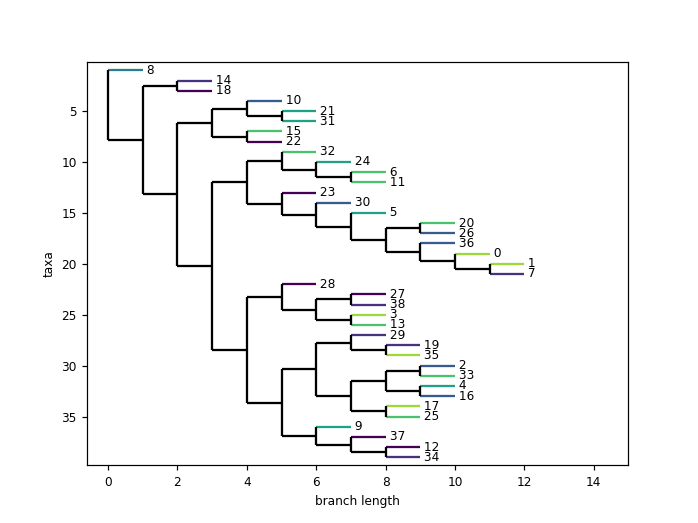

In [62]:
plt.rcParams.update({'font.size': 8})
Phylo.draw(tree)

<IPython.core.display.Javascript object>


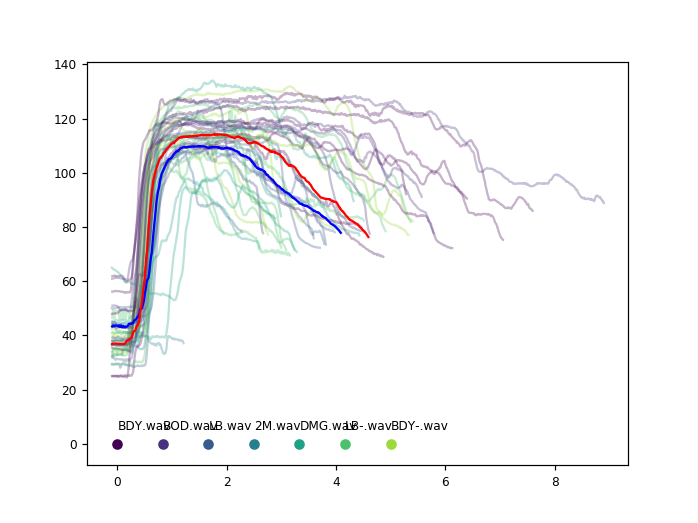

BDY-.wav 0
BDY-.wav 1
LB.wav 2
BDY-.wav 3
DMG.wav 4
DMG.wav 5
LB-.wav 6
BOD.wav 7
m2M.wav 8
DMG.wav 9
LB.wav 10
LB-.wav 11
BDY.wav 12
LB-.wav 13
BOD.wav 14
LB-.wav 15
LB.wav 16
BDY-.wav 17
BDY.wav 18
BOD.wav 19
LB-.wav 20
mDMG.wav 21
BDY.wav 22
BDY.wav 23
DMG.wav 24
LB-.wav 25
LB.wav 26
BDY.wav 27
BDY.wav 28
BOD.wav 29
LB.wav 30
mDMG.wav 31
LB-.wav 32
LB-.wav 33
BOD.wav 34
BDY-.wav 35
LB.wav 36
BDY.wav 37
BOD.wav 38


In [63]:
fig,ax = plt.subplots()


for s in seqs[:39]:
    print(s.song,s.index)
    ax.plot(s.ts,s.data[:,0],alpha=.3,color=songColors[s.song])
ax.plot(seqs[74].ts,seqs[74].data[:,0],color='blue')
ax.plot(seqs[73].ts,seqs[73].data[:,0],color='red')

for c in range(len(songs_ordered)):
    ax.scatter(c*5/6,0,color=songColors[songs_ordered[c]])
    ax.text(c*5/6,0+5,songs_ordered[c])
fig.show()

<IPython.core.display.Javascript object>


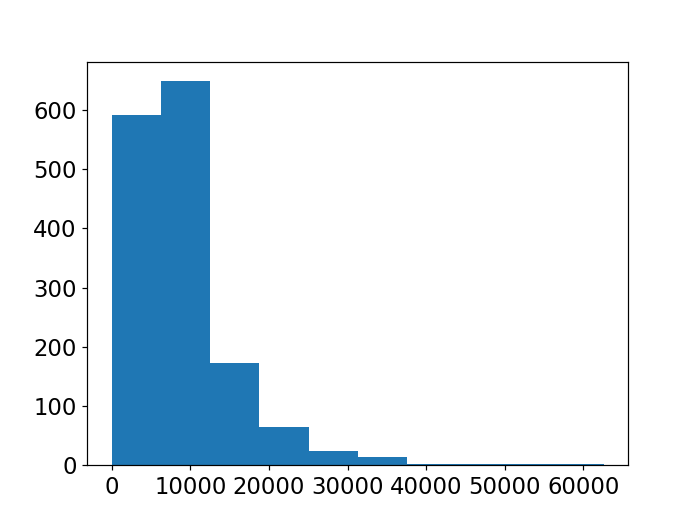

In [57]:
fig,ax = plt.subplots()
ax.hist(X.flatten())

fig.show()

<IPython.core.display.Javascript object>


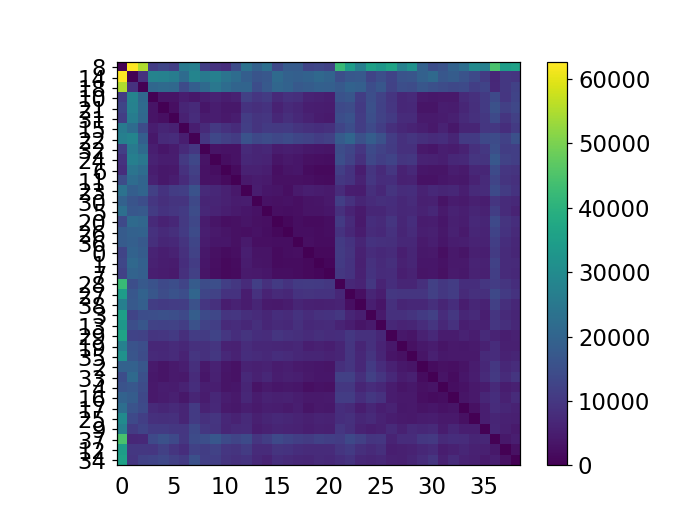

In [60]:
str_list = str(seqs[-1].hierarchy).replace('[','').replace(']','').split(', ')
int_list = [int(x) for x in str_list]

fig,ax = plt.subplots()

heatmap = ax.imshow(X[int_list][:,int_list])
#ax.set_xticks(range(len(int_list)))
ax.set_yticks(range(len(int_list)))
#ax.set_xticklabels(int_list)
ax.set_yticklabels(int_list)
ax.tick_params(axis='x',bottom=False)
fig.colorbar(heatmap)
#ax2.imshow(range(X.min(),X.max()))

fig.show()

In [47]:
from io import StringIO

<IPython.core.display.Javascript object>


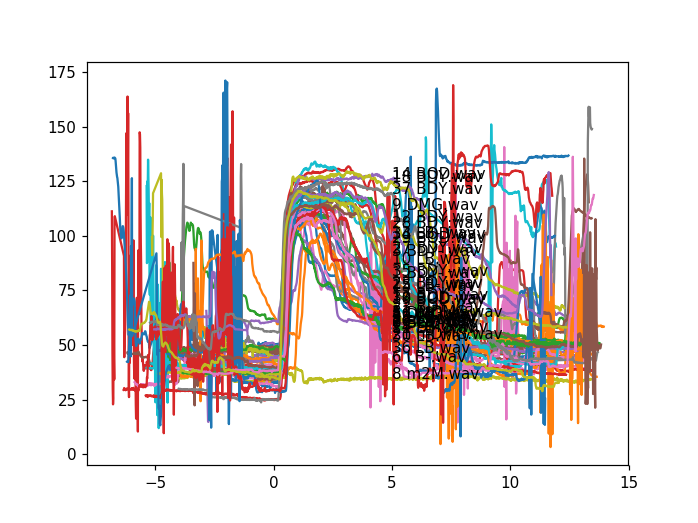

In [36]:
%matplotlib notebook

fig, ax = plt.subplots()

for seq in seqs[:39]:
    ax.plot(seq.seq_data[:,0],seq.seq_data[:,5])
    ax.text(seq.ts[-1],seq.data[-1,0],str(seq.index) + ' ' + seq.song)
    
fig.show()

/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


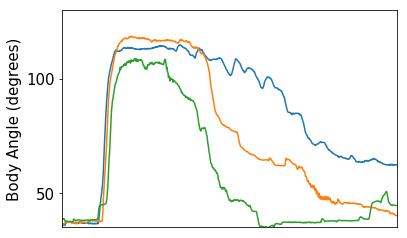

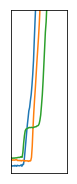

In [9]:
fig, ax = plt.subplots()

fig2,ax2 = plt.subplots()

import matplotlib.pyplot as plt


a = 28
b = 19
c = 36

ax.plot(seqs[a].seq_data[:,0],seqs[a].seq_data[:,5],label=seqs[a].song)
ax.plot(seqs[19].seq_data[:,0],seqs[19].seq_data[:,5],label=seqs[19].song)
ax.plot(seqs[36].seq_data[:,0],seqs[36].seq_data[:,5],label=seqs[36].song)
#ax.axvline(0.0,color='k',linestyle=':')
#ax.axvline(0.9,color='k',linestyle=':')
#ax.set_xlabel('Time (s)')
ax.set_ylabel('Body Angle (degrees)')

ax.set_xlim([-1,10])
ax.set_ylim([35,130])
ax2.plot(seqs[a].seq_data[:,0],seqs[a].seq_data[:,5],label=seqs[a].song)
ax2.plot(seqs[19].seq_data[:,0],seqs[19].seq_data[:,5],label=seqs[19].song)
ax2.plot(seqs[36].seq_data[:,0],seqs[36].seq_data[:,5],label=seqs[36].song)



ax2.set_xlim([0.0,0.9])
ax2.set_ylim([35,70])

fig2.set_size_inches(10,4)
fig2.set_size_inches(1,3)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)

ax.get_xaxis().set_visible(False)
ax.set_yticks([50,100])
#ax.set_xticks([0,10])
#ax.legend()



plt.rcParams.update({'font.size': 15})

fig.show()
fig2.show()
#"""
fig.savefig('./main_plot2.png',dpi=300)
fig.savefig('./main_plot2.svg')
fig2.savefig('./cutout2.png',dpi=300)
fig.savefig('./cutout2.svg')
#"""

<IPython.core.display.Javascript object>


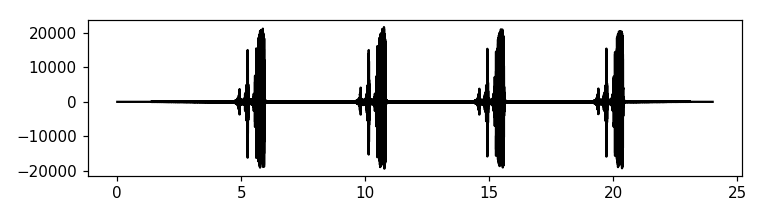

In [126]:
from scipy.io.wavfile import read
a = read("/home/ammon/Documents/birds/src/bird_recording/music/bdynoise.wav")
p_wav = np.array(a[1],dtype=float)

fig,ax = plt.subplots()
ts = np.arange(len(p_wav)) / 40000
ax.plot(ts,p_wav,color='black')
fig.show()
fig.set_size_inches([7,2])
fig.tight_layout()
fig.savefig('/home/ammon/Desktop/SfNFigs/bdynoise_trace.png',dpi=300)
